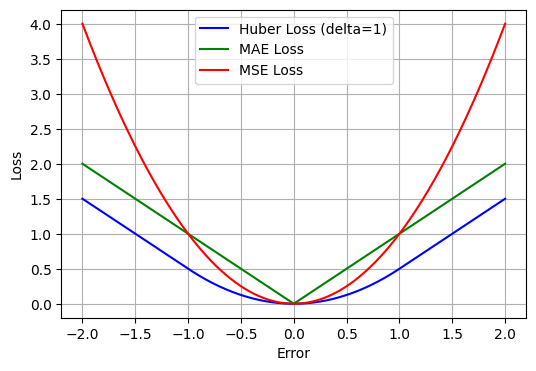

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Define the custom loss functions
def mae_loss(error):
    return np.abs(error)

def mse_loss(error):
    return error**2

# Generate a range of prediction errors
errors = np.linspace(-2, 2, 400)

# Calculate the loss values
delta = 1.0  # Delta value for the Huber loss
huber_loss_fn = nn.SmoothL1Loss(beta=delta, reduction='none')

# Convert errors to a PyTorch tensor
errors_tensor = torch.tensor(errors, dtype=torch.float32)

# Calculate Huber loss using PyTorch's SmoothL1Loss
huber_losses = huber_loss_fn(errors_tensor, torch.zeros_like(errors_tensor)).numpy()

# Calculate MAE and MSE losses
mae_losses = mae_loss(errors)
mse_losses = mse_loss(errors)

# Plot the loss functions
plt.figure(figsize=(6, 4))
plt.plot(errors, huber_losses, label='Huber Loss (delta=1)', color='blue')
plt.plot(errors, mae_losses, label='MAE Loss', color='green')
plt.plot(errors, mse_losses, label='MSE Loss', color='red')
plt.xlabel('Error')
plt.ylabel('Loss')
#plt.title('Comparison of Loss Functions')
plt.legend()
plt.grid(True)
plt.savefig('loss_comparison.png', dpi=300)
plt.show()
